In [1]:
import pandas as pd # data frame library
import seaborn as sns # data visialization library
import matplotlib.pyplot as plt
import numpy

In [2]:
df = pd.read_csv('/content/heart failure.csv')

In [3]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [5]:
df = df.rename({'DEATH_EVENT':'death'},axis=1)

In [6]:
df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,death
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


In [7]:
df.death.value_counts()

0    203
1     96
Name: death, dtype: int64

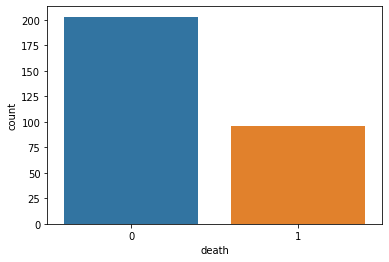

In [8]:
sns.countplot(x='death',data=df)

In [9]:
x = df.drop('death',axis=1)

In [10]:
y = df['death']

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y,train_size=.70,random_state=42)

In [13]:
ytest

281    0
265    0
164    1
9      1
77     0
      ..
132    0
72     1
15     1
10     1
157    0
Name: death, Length: 90, dtype: int64

In [14]:
ytest.shape

(90,)

In [15]:
xtest.shape

(90, 12)

In [16]:
# Apply Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(xtrain,ytrain) #train the model with 70% of data from dataset

DecisionTreeClassifier()

In [17]:
pred = dt.predict(xtest) # pred is corrsponding to ytest

In [18]:
ytest

281    0
265    0
164    1
9      1
77     0
      ..
132    0
72     1
15     1
10     1
157    0
Name: death, Length: 90, dtype: int64

In [19]:
pred # Predicted value of Y

array([1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1])

In [20]:
import numpy as np
np.array(ytest) # Actual Value of Y

array([0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 0])

In [21]:
dt.score(xtest,ytest)

0.6666666666666666

In [22]:
# Evaluate the ML model
from sklearn.metrics import classification_report , accuracy_score, confusion_matrix, plot_roc_curve

In [23]:
classification_report(ytest,pred) 

'              precision    recall  f1-score   support\n\n           0       0.69      0.79      0.74        53\n           1       0.62      0.49      0.55        37\n\n    accuracy                           0.67        90\n   macro avg       0.65      0.64      0.64        90\nweighted avg       0.66      0.67      0.66        90\n'

In [24]:
print(classification_report(ytest,pred))

              precision    recall  f1-score   support

           0       0.69      0.79      0.74        53
           1       0.62      0.49      0.55        37

    accuracy                           0.67        90
   macro avg       0.65      0.64      0.64        90
weighted avg       0.66      0.67      0.66        90



In [25]:
test_confusion_matrix = confusion_matrix(ytest,pred)

In [26]:
test_confusion_matrix

array([[42, 11],
       [19, 18]])

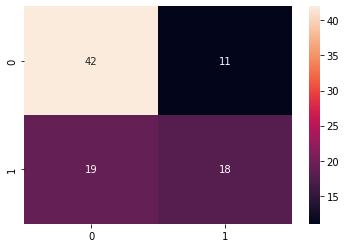

In [27]:
sns.heatmap(test_confusion_matrix, annot=True)

In [28]:
tp, fn, fp, tn = confusion_matrix(ytest,pred).reshape(-1)

In [29]:
dt.score(xtest,ytest)

0.6666666666666666

In [30]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier() # default parameters
clf.fit(xtrain, ytrain)

RandomForestClassifier()

In [31]:
clf.score(xtest, ytest)

0.7555555555555555

In [32]:
#  Hyper Parameter Tuning for gridSearchCV
trees = np.random.randint(15,200,25)
trees

array([148, 183,  34, 158,  67,  15, 112,  32, 162, 111,  83, 166, 101,
        94,  30, 117,  19, 186,  64,  80, 144, 103, 137, 144, 138])

In [33]:
criterion = ['gini','entropy']
max_depth = np.random.randint(1,15,20)
min_samples_split = [2,3,4]
max_features = ['sqrt','log2']

In [34]:
ids = {
    'n_estimators' : trees,
    'criterion' : criterion,
    'max_depth' : max_depth,
    'min_samples_split' : min_samples_split,
    'max_features' : max_features
}

In [35]:
from sklearn.model_selection import GridSearchCV
gcv = GridSearchCV(clf,ids)
gcv.fit(xtrain,ytrain)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([12, 11,  4, 11,  3,  3,  6, 10,  3,  6,  5,  5,  1, 14,  3,  3,  2,
       13,  5,  9]),
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': array([148, 183,  34, 158,  67,  15, 112,  32, 162, 111,  83, 166, 101,
        94,  30, 117,  19, 186,  64,  80, 144, 103, 137, 144, 138])})

In [36]:
gcv.cv_results_

{'mean_fit_time': array([0.22342486, 0.27525778, 0.05303059, ..., 0.21107788, 0.21465473,
        0.20748754]),
 'mean_score_time': array([0.01903434, 0.02082982, 0.00640063, ..., 0.01862197, 0.01891212,
        0.01633296]),
 'mean_test_score': array([0.87108014, 0.87584204, 0.85679443, ..., 0.86155633, 0.86155633,
        0.87108014]),
 'param_criterion': masked_array(data=['gini', 'gini', 'gini', ..., 'entropy', 'entropy',
                    'entropy'],
              mask=[False, False, False, ..., False, False, False],
        fill_value='?',
             dtype=object),
 'param_max_depth': masked_array(data=[12, 12, 12, ..., 9, 9, 9],
              mask=[False, False, False, ..., False, False, False],
        fill_value='?',
             dtype=object),
 'param_max_features': masked_array(data=['sqrt', 'sqrt', 'sqrt', ..., 'log2', 'log2', 'log2'],
              mask=[False, False, False, ..., False, False, False],
        fill_value='?',
             dtype=object),
 'param_min_samp

In [37]:
result = pd.DataFrame(gcv.cv_results_)
result

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_max_features,param_min_samples_split,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.223425,0.005762,0.019034,0.002857,gini,12,sqrt,2,148,"{'criterion': 'gini', 'max_depth': 12, 'max_fe...",0.761905,0.904762,0.976190,0.785714,0.926829,0.871080,0.083063,592
1,0.275258,0.008033,0.020830,0.002331,gini,12,sqrt,2,183,"{'criterion': 'gini', 'max_depth': 12, 'max_fe...",0.785714,0.904762,0.952381,0.809524,0.926829,0.875842,0.066054,151
2,0.053031,0.002534,0.006401,0.000428,gini,12,sqrt,2,34,"{'criterion': 'gini', 'max_depth': 12, 'max_fe...",0.761905,0.857143,0.928571,0.809524,0.926829,0.856794,0.065262,4020
3,0.230802,0.007923,0.017907,0.001240,gini,12,sqrt,2,158,"{'criterion': 'gini', 'max_depth': 12, 'max_fe...",0.785714,0.904762,0.928571,0.785714,0.926829,0.866318,0.066346,1450
4,0.104063,0.003515,0.008965,0.000878,gini,12,sqrt,2,67,"{'criterion': 'gini', 'max_depth': 12, 'max_fe...",0.738095,0.880952,0.952381,0.785714,0.926829,0.856794,0.082179,4020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,0.220894,0.004729,0.019312,0.002543,entropy,9,log2,4,144,"{'criterion': 'entropy', 'max_depth': 9, 'max_...",0.761905,0.904762,0.928571,0.785714,0.926829,0.861556,0.072527,2994
5996,0.154488,0.002016,0.015227,0.001625,entropy,9,log2,4,103,"{'criterion': 'entropy', 'max_depth': 9, 'max_...",0.738095,0.880952,0.928571,0.785714,0.926829,0.852033,0.077031,4742
5997,0.211078,0.006248,0.018622,0.003132,entropy,9,log2,4,137,"{'criterion': 'entropy', 'max_depth': 9, 'max_...",0.761905,0.904762,0.928571,0.785714,0.926829,0.861556,0.072527,2994
5998,0.214655,0.001815,0.018912,0.002590,entropy,9,log2,4,144,"{'criterion': 'entropy', 'max_depth': 9, 'max_...",0.761905,0.904762,0.928571,0.785714,0.926829,0.861556,0.072527,2994


In [38]:
gcv.best_score_

0.8948896631823462

In [39]:
gcv.best_params_

{'criterion': 'gini',
 'max_depth': 3,
 'max_features': 'log2',
 'min_samples_split': 3,
 'n_estimators': 19}

In [40]:
clf2 = RandomForestClassifier(
    criterion = 'gini', 
    max_depth = 3,
    max_features = 'log2',
    min_samples_split = 3,
    n_estimators = 19
)

In [41]:
clf2.fit(xtrain,ytrain)

RandomForestClassifier(max_depth=3, max_features='log2', min_samples_split=3,
                       n_estimators=19)

In [42]:
clf2.score(xtest,ytest) 

0.7777777777777778

In [43]:
# Another Way 
clf3 = gcv.best_estimator_
clf3

RandomForestClassifier(max_depth=3, max_features='log2', min_samples_split=3,
                       n_estimators=19)

In [44]:
clf3.fit(xtrain,ytrain)

RandomForestClassifier(max_depth=3, max_features='log2', min_samples_split=3,
                       n_estimators=19)

In [45]:
clf3.score(xtest,ytest)

0.7666666666666667